In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df_india = pd.read_csv ("corona_india_state.csv")
df_india

,State/UT,Cases,Death
0,Andhra Pradesh,305,4
1,Andaman and Nicobar,10,0
2,Arunachal Pradesh,1,0
3,Assam,27,0
4,Bihar,38,1
5,Chandigarh,18,0
6,Chhattisgarh,10,0
7,Delhi,576,9
8,Goa,7,0
9,Gujarat,165,13


Text(0, 0.5, 'Death')

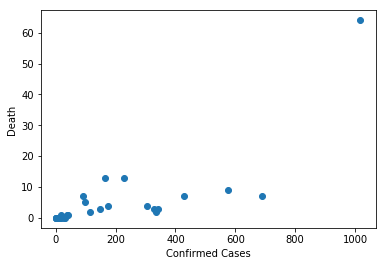

In [3]:
plt.scatter(df_india['Cases'],df_india['Death'])
plt.xlabel('Confirmed Cases')
plt.ylabel('Death')

In [4]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_india[['Cases','Death']])
    sse.append(km.inertia_)

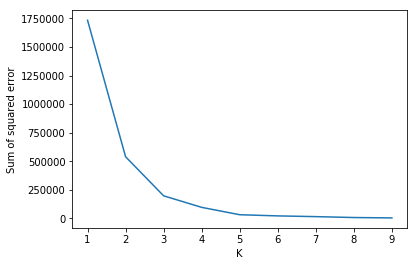

In [5]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [6]:
km1 = KMeans(n_clusters=3)
y_predicted1 = km1.fit_predict(df_india[['Cases','Death']])
y_predicted1

array([2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 0, 2, 1, 2, 0, 0, 2, 0])

In [7]:
df_india['cluster']=y_predicted1
df_india.head()

,State/UT,Cases,Death,cluster
0,Andhra Pradesh,305,4,2
1,Andaman and Nicobar,10,0,0
2,Arunachal Pradesh,1,0,0
3,Assam,27,0,0
4,Bihar,38,1,0


In [8]:
km1.cluster_centers_

array([[ 46.45454545,   1.68181818],
       [761.33333333,  26.66666667],
       [328.        ,   5.33333333]])

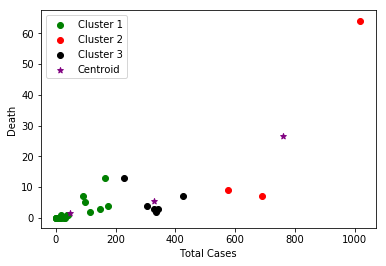

In [9]:
df_1 = df_india[df_india.cluster==0]
df_2 = df_india[df_india.cluster==1]
df_3 = df_india[df_india.cluster==2]
plt.scatter(df_1['Cases'],df_1['Death'],color='green',label='Cluster 1')
plt.scatter(df_2['Cases'],df_2['Death'],color='red',label='Cluster 2')
plt.scatter(df_3['Cases'],df_3['Death'],color='black',label='Cluster 3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Total Cases')
plt.ylabel('Death')
plt.legend()

In [10]:
df_1

,State/UT,Cases,Death,cluster
1,Andaman and Nicobar,10,0,0
2,Arunachal Pradesh,1,0,0
3,Assam,27,0,0
4,Bihar,38,1,0
5,Chandigarh,18,0,0
6,Chhattisgarh,10,0,0
8,Goa,7,0,0
9,Gujarat,165,13,0
10,Haryana,147,3,0
11,Himachal Pradesh,18,1,0


In [12]:
df_3

,State/UT,Cases,Death,cluster
0,Andhra Pradesh,305,4,2
15,Kerala,336,2,2
17,Madhya Pradesh,229,13,2
24,Rajasthan,328,3,2
26,Telengana,427,7,2
29,Uttar Pradesh,343,3,2


In [13]:
df_2

,State/UT,Cases,Death,cluster
7,Delhi,576,9,1
18,Maharashtra,1018,64,1
25,Tamil Nadu,690,7,1
